In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
%%time
data = gpd.read_file('./datos/crops/OCUPAC_Pol_MCA_VE2021.zip')

CPU times: user 33 s, sys: 198 ms, total: 33.2 s
Wall time: 33.3 s


In [3]:
data

FEATURE  CRECINTO     ETIQUETA            TIPO  CABIDA  CGRUPO  \
0      31000021  103160.0          r3V  3-5 riegos/año       0       4   
1      31000021  103176.0            V          Secano       0       3   
2      31000021  103181.0            V          Secano       0       3   
3      31000021  103188.0            V          Secano       0       3   
4      31000021  103191.0           RV  R. sin limites       0       4   
...         ...       ...          ...             ...     ...     ...   
65763  31000021  107130.0    Ph>lz60 !          Secano      60       6   
65764  31000021  107145.0  Mm<75+Mc<25          Secano       0       5   
65765  31000021  107147.0         r2Ch  1-2 riegos/año       0       2   
65766  31000021  107152.0           Mm          Secano       0       5   
65767  31000021  107155.0           Mc          Secano       0       5   

                            GRUPO  \
0        Cultivos leñosos regadío   
1         Cultivos leñosos secano   
2         Cultivos leñosos secano   
3         Cultivos leñosos secano   
4        Cultivos leñosos regadío   
...                           ...   
65763                   Coníferas   
65764        Forestal no arbolado   
65765  Cultivos herbáceos regadío   
65766        Forestal no arbolado   
65767        Forestal no arbolado   

                                              COBERTURAP  \
0                                                   Viña   
1                                                   Viña   
2                                                   Viña   
3                                                   Viña   
4                                                   Viña   
...                                                  ...   
65763                   Pino carrasco (Pinus halepensis)   
65764                              MATORRAL MEDITERRÁNEO   
65765                                 CULTIVOS HERBÁCEOS   
65766                              MATORRAL MEDITERRÁNEO   
65767  Carrizal (Phragmites australis, Typha latifoli...   

                                      MOSAICO1            COBERTURA1  ...  \
0                                   Viña(100%)  % en el mosaico: 100  ...   
1                                   Viña(100%)  % en el mosaico: 100  ...   
2                                   Viña(100%)  % en el mosaico: 100  ...   
3                                   Viña(100%)  % en el mosaico: 100  ...   
4                                   Viña(100%)  % en el mosaico: 100  ...   
...                                        ...                   ...  ...   
65763  Pino carrasco  en estado latizal (100%)  % en el mosaico: 100  ...   
65764              Matorral mediterráneo(100%)   % en el mosaico: 75  ...   
65765                 Cultivos herbáceos(100%)  % en el mosaico: 100  ...   
65766              Matorral mediterráneo(100%)  % en el mosaico: 100  ...   
65767                          Carrizal (100%)  % en el mosaico: 100  ...   

      NOTA7 NOTAUSO7 NOTA8 NOTAUSO8 HECTAREAS FECHADATOS GEOM_AREA GEOM_PERI  \
0       NaN      NaN   NaN      NaN      3.34       2021  33398.54   1542.38   
1       NaN      NaN   NaN      NaN      4.29       2021  42921.34    837.05   
2       NaN      NaN   NaN      NaN      1.72       2021  17235.23    810.36   
3       NaN      NaN   NaN      NaN      7.42       2021  74154.91   1296.48   
4       NaN      NaN   NaN      NaN      2.40       2021  24008.78    618.90   
...     ...      ...   ...      ...       ...        ...       ...       ...   
65763   NaN      NaN   NaN      NaN      1.14       2021  11444.08    438.06   
65764   NaN      NaN   NaN      NaN      1.59       2021  15932.20    930.78   
65765   NaN      NaN   NaN      NaN      0.48       2021   4835.76    394.01   
65766   NaN      NaN   NaN      NaN      1.27       2021  12726.07    853.79   
65767   NaN      NaN   NaN      NaN      1.78       2021  17787.84    750.32   

        BEGINLIFE                                           geometr

In [4]:
data.COBERTURAP.value_counts().head(20)

COBERTURAP
Cultivos herbáceos                      7259
Matorral mediterráneo                   5002
Pastizal                                3084
Viña                                    2606
Praderas                                2404
Pino silvestre (Pinus sylvestris)       2368
ENSANCHE                                2361
Olivo                                   2163
PASTIZAL MATORRAL                       2071
OTRAS MEZCLAS DE FRONDOSAS              2061
Pino carrasco (Pinus halepensis)        2007
Haya (Fagus sylvatica)                  1954
Pino laricio (Pinus nigra)              1710
AGRÍCOLA-GANADERO                       1615
Roble pubescente (Quercus pubescens)    1474
Carrasca (Quercus rotundifolia)         1438
Almendro                                1407
MATORRAL ARBOLADO                       1126
Roble pedunculado (Quercus robur)       1071
CASCO                                   1053
Name: count, dtype: int64

In [9]:
data = pd.concat([data.query('COBERTURAP == "Viña"'), data.query('COBERTURAP == "Olivo"')])

In [11]:
len(data)

4769

In [12]:
data.COBERTURAP.value_counts()

COBERTURAP
Viña     2606
Olivo    2163
Name: count, dtype: int64

In [21]:
from pathlib import Path
import rasterio
import xarray as xr
import numpy as np

In [22]:
res = {'path':'/home/alabarga/Teaching/geospatial-python-cr23/course/sesion-5-ai-machine-learning/datos/downloads/S2B_MSIL2A_20230212T110059_N0509_R094_T30TWN_20230212T135411.zip'}

In [45]:
class RasterSpec:
    def __init__(self, transform, width, height, crs):
        self.transform = transform
        self.width = width
        self.height = height
        self.crs = crs

In [62]:
from shapely.geometry import Polygon
def bbox_to_polygon(bbox):
    minx, miny, maxx, maxy = bbox.left, bbox.bottom, bbox.right, bbox.top
    polygon = Polygon([(minx, miny), (minx, maxy), (maxx, maxy), (maxx, miny)])
    return polygon

In [65]:

        
def sentinel_to_xarray(res):
    
    bands = next((Path.cwd() / Path(res['path']).with_suffix('.SAFE') / 'GRANULE').iterdir()) / 'IMG_DATA' / 'R10m'
    blue_band = [l for l in bands.iterdir() if '_B02_' in l.name][0]
    green_band = [l for l in bands.iterdir() if '_B03_' in l.name][0]
    red_band = [l for l in bands.iterdir() if '_B04_' in l.name][0]
    nir_band = [l for l in bands.iterdir() if '_B08_' in l.name][0]

    blue = rasterio.open(blue_band, driver='JP2OpenJPEG') 
    green = rasterio.open(green_band, driver='JP2OpenJPEG') 
    red = rasterio.open(red_band, driver='JP2OpenJPEG') 
    nir = rasterio.open(nir_band, driver='JP2OpenJPEG')

    
    # Get the affine transform matrix from the rasterio DatasetReader
    transform = red.transform

    # Get the spatial dimensions of the dataset
    height, width = red.height, red.width

    # Get the coordinate reference system (CRS) of the dataset
    crs = red.crs.to_string()

    # Create the RasterSpec using the obtained information
    raster_spec = RasterSpec(transform, width, height, crs)
    
    band_names = ['B04', 'B03', 'B02', 'B08']
    band_images = [red.read(1), green.read(1), blue.read(1), nir.read(1)]
    
    # Concatenate the images along the 'bands' dimension to create a 3D array
    stacked_images = np.stack(band_images, axis=0)

    # Create a DataArray with the stacked images
    xarr_data = xr.DataArray(stacked_images, dims=('bands', 'y', 'x'))

    # Set coordinate values for x and y dimensions
    xarr_data.coords['x'] = np.arange(0, stacked_images.shape[2])
    xarr_data.coords['y'] = np.arange(0, stacked_images.shape[1])

    # Add a 'bands' coordinate with band names
    xarr_data.coords['bands'] = band_names

    # Set the coordinate reference system (CRS) as an attribute
    xarr_data.attrs['crs'] = crs
    xarr_data.attrs['spec'] = raster_spec
    xarr_data.attrs['transform'] = transform
    xarr_data.attrs['bounds'] = bbox_to_polygon(red.bounds)

    return xarr_data


In [66]:
xarr = sentinel_to_xarray(res)

In [27]:
import spyndex

In [31]:
idx = spyndex.computeIndex(
    index = ["NDVI","GNDVI","SAVI"],
    params = {
        "N": xarr.sel(bands = "B08"),
        "R": xarr.sel(bands = "B04"),
        "G": xarr.sel(bands = "B03"),
        "L": 0.5
    }
)

In [68]:
idx.index.values

array(['NDVI', 'GNDVI', 'SAVI'], dtype='<U5')

In [59]:
help(gpd.clip)

Help on function clip in module geopandas.tools.clip:

clip(gdf, mask, keep_geom_type=False)
    Clip points, lines, or polygon geometries to the mask extent.
    
    Both layers must be in the same Coordinate Reference System (CRS).
    The ``gdf`` will be clipped to the full extent of the clip object.
    
    If there are multiple polygons in mask, data from ``gdf`` will be
    clipped to the total boundary of all polygons in mask.
    
    If the ``mask`` is list-like with four elements ``(minx, miny, maxx, maxy)``, a
    faster rectangle clipping algorithm will be used. Note that this can lead to
    slightly different results in edge cases, e.g. if a line would be reduced to a
    point, this point might not be returned.
    The geometry is clipped in a fast but possibly dirty way. The output is not
    guaranteed to be valid. No exceptions will be raised for topological errors.
    
    Parameters
    ----------
    gdf : GeoDataFrame or GeoSeries
        Vector layer (point, l

In [72]:
data_sel = gpd.clip(data.to_crs(crs), mask=xarr.attrs['bounds'])

In [73]:
len(data)

4769

In [74]:
len(data_sel)

2526

In [88]:
array = idx.sel(index='NDVI').data
affine = xarr.attrs['transform']
crs = xarr.attrs['crs']

stats = zonal_stats(data_sel.to_crs(crs), array, affine=affine)

In [102]:
def calculate_index_mean(data,array):
    res = pd.DataFrame()

    affine = xarr.attrs['transform']
    crs = xarr.attrs['crs']
    data = data.to_crs(crs)
    for i in idx.index.data:
        array = idx.sel(index=i).data
        stats = zonal_stats(data, array, affine=affine)
        stats = pd.DataFrame(stats)
        stats.index=data_sel.index
        res[i] = stats['mean']
    return res
    

In [103]:
res = calculate_index_mean(data_sel, xarr)

In [104]:
res

NDVI     GNDVI      SAVI
38388  0.166207  0.241485  0.249287
30029  0.121804  0.199014  0.182691
46278  0.156313  0.215113  0.234449
55642  0.141693  0.211599  0.212520
34276  0.163785  0.231561  0.245656
...         ...       ...       ...
52105  0.225302  0.266060  0.337924
45600  0.313929  0.334058  0.470856
51508  0.377385  0.377307  0.566028
35273  0.261977  0.291989  0.392924
46326  0.269760  0.296724  0.404603

[2526 rows x 3 columns]

In [ ]:
datos = data_sel[[]].join(res)

In [90]:
len(stats)

2526

In [91]:
len(data_sel)

2526

In [94]:
stats = pd.DataFrame(stats)

In [97]:
stats.index=data_sel.index

In [98]:
stats[['mean']]

mean
38388  0.166207
30029  0.121804
46278  0.156313
55642  0.141693
34276  0.163785
...         ...
52105  0.225302
45600  0.313929
51508  0.377385
35273  0.261977
46326  0.269760

[2526 rows x 1 columns]

In [107]:
datos = data_sel[['COBERTURAP','geometry']].join(res)

In [108]:
datos

COBERTURAP                                           geometry      NDVI  \
38388       Viña  POLYGON ((608820.279 4693416.648, 608826.117 4...  0.166207   
30029       Viña  POLYGON ((607931.266 4697775.057, 607937.825 4...  0.121804   
46278       Viña  POLYGON ((609716.652 4696918.498, 609629.882 4...  0.156313   
55642       Viña  POLYGON ((608313.754 4698514.894, 608236.469 4...  0.141693   
34276       Viña  POLYGON ((608016.300 4699077.910, 608078.231 4...  0.163785   
...          ...                                                ...       ...   
52105       Viña  POLYGON ((609671.016 4707954.060, 609657.662 4...  0.225302   
45600       Viña  POLYGON ((609754.046 4707997.315, 609768.542 4...  0.313929   
51508      Olivo  POLYGON ((609728.074 4708542.122, 609710.474 4...  0.377385   
35273       Viña  POLYGON ((609740.301 4710097.518, 609700.848 4...  0.261977   
46326      Olivo  POLYGON ((609769.247 4711993.923, 609770.397 4...  0.269760   

          GNDVI      SAVI  
38388  0.241485  0.249287  
30029  0.199014  0.182691  
46278  0.215113  0.234449  
55642  0.211599  0.212520  
34276  0.231561  0.245656  
...         ...       ...  
52105  0.266060  0.337924  
45600  0.334058  0.470856  
51508  0.377307  0.566028  
35273  0.291989  0.392924  
46326  0.296724  0.404603  

[2526 rows x 5 columns]

In [110]:
from sklearn.preprocessing import LabelEncoder

array([1, 1, 1, ..., 0, 1, 0])

In [124]:
datos = datos.dropna()

In [125]:
X = datos[['NDVI', 'GNDVI', 'SAVI']]
y = LabelEncoder().fit_transform(datos['COBERTURAP'])

In [126]:
datos.head()

COBERTURAP                                           geometry      NDVI  \
38388       Viña  POLYGON ((608820.279 4693416.648, 608826.117 4...  0.166207   
30029       Viña  POLYGON ((607931.266 4697775.057, 607937.825 4...  0.121804   
46278       Viña  POLYGON ((609716.652 4696918.498, 609629.882 4...  0.156313   
55642       Viña  POLYGON ((608313.754 4698514.894, 608236.469 4...  0.141693   
34276       Viña  POLYGON ((608016.300 4699077.910, 608078.231 4...  0.163785   

          GNDVI      SAVI  
38388  0.241485  0.249287  
30029  0.199014  0.182691  
46278  0.215113  0.234449  
55642  0.211599  0.212520  
34276  0.231561  0.245656

In [127]:
len(datos)

2525

In [128]:
from sklearn.decomposition import PCA

In [130]:
import matplotlib.pyplot as plt

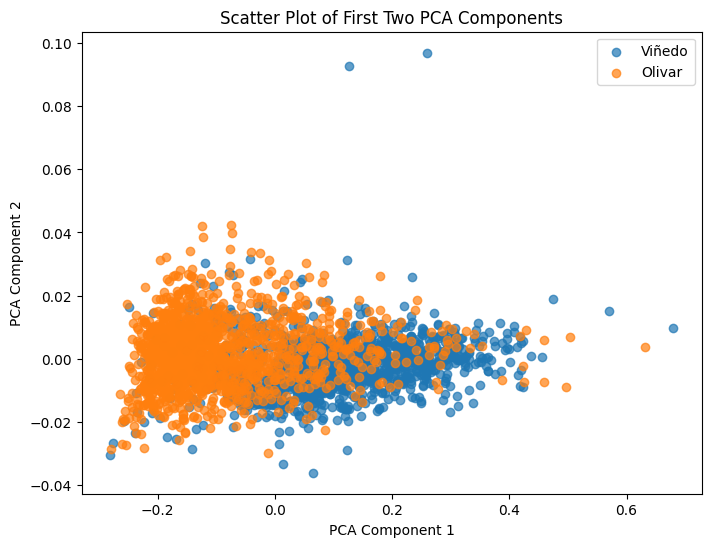

In [131]:
# Step 3: Visualize data using PCA (reduce dimensions to 2 for plotting)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X)

# Plot data points with different classes using PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[y == 0, 0], X_train_pca[y == 0, 1], label="Viñedo", alpha=0.7)
plt.scatter(X_train_pca[y == 1, 0], X_train_pca[y == 1, 1], label="Olivar", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Scatter Plot of First Two PCA Components")
plt.legend()
plt.show()

In [140]:
datos.reset_index()

index COBERTURAP                                           geometry  \
0     38388       Viña  POLYGON ((608820.279 4693416.648, 608826.117 4...   
1     30029       Viña  POLYGON ((607931.266 4697775.057, 607937.825 4...   
2     46278       Viña  POLYGON ((609716.652 4696918.498, 609629.882 4...   
3     55642       Viña  POLYGON ((608313.754 4698514.894, 608236.469 4...   
4     34276       Viña  POLYGON ((608016.300 4699077.910, 608078.231 4...   
...     ...        ...                                                ...   
2520  52105       Viña  POLYGON ((609671.016 4707954.060, 609657.662 4...   
2521  45600       Viña  POLYGON ((609754.046 4707997.315, 609768.542 4...   
2522  51508      Olivo  POLYGON ((609728.074 4708542.122, 609710.474 4...   
2523  35273       Viña  POLYGON ((609740.301 4710097.518, 609700.848 4...   
2524  46326      Olivo  POLYGON ((609769.247 4711993.923, 609770.397 4...   

          NDVI     GNDVI      SAVI  
0     0.166207  0.241485  0.249287  
1     0.121804  0.199014  0.182691  
2     0.156313  0.215113  0.234449  
3     0.141693  0.211599  0.212520  
4     0.163785  0.231561  0.245656  
...        ...       ...       ...  
2520  0.225302  0.266060  0.337924  
2521  0.313929  0.334058  0.470856  
2522  0.377385  0.377307  0.566028  
2523  0.261977  0.291989  0.392924  
2524  0.269760  0.296724  0.404603  

[2525 rows x 6 columns]

In [135]:
import folium as fl

In [138]:
name='pamplona'
latitude=42.81349804717014
longitude=-1.6453010275390108
zoom=9

In [139]:
m = fl.Map([latitude, longitude], zoom_start=zoom)
m

In [147]:
datos = datos.reset_index().rename(columns={'index':'id'})

In [150]:
datos

id COBERTURAP                                           geometry  \
0     38388       Viña  POLYGON ((608820.279 4693416.648, 608826.117 4...   
1     30029       Viña  POLYGON ((607931.266 4697775.057, 607937.825 4...   
2     46278       Viña  POLYGON ((609716.652 4696918.498, 609629.882 4...   
3     55642       Viña  POLYGON ((608313.754 4698514.894, 608236.469 4...   
4     34276       Viña  POLYGON ((608016.300 4699077.910, 608078.231 4...   
...     ...        ...                                                ...   
2520  52105       Viña  POLYGON ((609671.016 4707954.060, 609657.662 4...   
2521  45600       Viña  POLYGON ((609754.046 4707997.315, 609768.542 4...   
2522  51508      Olivo  POLYGON ((609728.074 4708542.122, 609710.474 4...   
2523  35273       Viña  POLYGON ((609740.301 4710097.518, 609700.848 4...   
2524  46326      Olivo  POLYGON ((609769.247 4711993.923, 609770.397 4...   

          NDVI     GNDVI      SAVI  
0     0.166207  0.241485  0.249287  
1     0.121804  0.199014  0.182691  
2     0.156313  0.215113  0.234449  
3     0.141693  0.211599  0.212520  
4     0.163785  0.231561  0.245656  
...        ...       ...       ...  
2520  0.225302  0.266060  0.337924  
2521  0.313929  0.334058  0.470856  
2522  0.377385  0.377307  0.566028  
2523  0.261977  0.291989  0.392924  
2524  0.269760  0.296724  0.404603  

[2525 rows x 6 columns]

In [158]:
datos['tipo'] = np.where(datos['COBERTURAP'] == 'Viña', 0, 1)

In [167]:
m = datos.explore(column='COBERTURAP',
               tooltip=["NDVI","GNDVI", "SAVI"],
               popup = False,
               cmap='Spectral', 
               legend=True,
               tiles='OpenStreetMap',
               color = 'white'
                            
              )
m